In [0]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [1]:
! pip install StellarGraph

     |████████████████████████████████| 296kB 3.5MB/s 
     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 3.8MB 51.8MB/s 
     |████████████████████████████████| 450kB 46.4MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*F(Cost2)*Cost3$</b> where $F(x) = x*(1-x)$<br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	Cost2 = $\frac{\text{max(number of actor nodes in cluster)}}{\text{total_number_of_actor_nodes}}$ <br><br>
    
	Cost3 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*F(Cost2)*Cost3
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*F(Cost2)*Cost3$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	Cost2 = $\frac{\text{max(number of movie nodes in cluster)}}{\text{total_number_of_movie_nodes}}$ <br><br>
	Cost3 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*(Cost2)*(1-Cost2)*Cost3
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


# <img src='https://i.imgur.com/ZLWQEhL.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

<h3>3.Apply Clustering Algorithm to group similar actors</h3>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


In [0]:
data = pd.read_csv("movie_actor_network.csv" , index_col=False, names = ['movie','actor'])
edges = [tuple(x) for x in data.values.tolist()]

#Bipartite Generating Graph
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(),bipartite=0,label='movie')
B.add_nodes_from(data['actor'].unique(),bipartite=1,label='actor')
B.add_edges_from(edges,label='acted')


In [0]:
A = list(B.subgraph(c) for c in nx.connected_components(B))[0]

In [6]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


Draw Graph

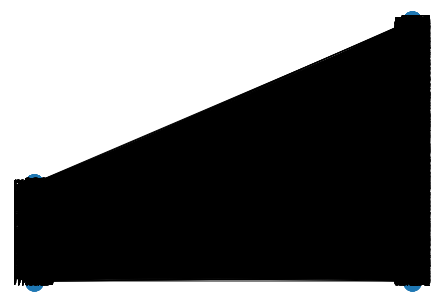

In [7]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [8]:
movies = []
actors = []
for i in B.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


Generate Random walks

In [9]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [10]:
print(walks[0])

['m1', 'a1', 'm4', 'a9', 'm4', 'a8', 'm4', 'a8', 'm4', 'a10', 'm4', 'a10', 'm4', 'a8', 'm4', 'a10', 'm4', 'a1', 'm5', 'a11', 'm5', 'a13', 'm5', 'a1', 'm3', 'a5', 'm3', 'a5', 'm3', 'a3', 'm659', 'a1718', 'm659', 'a1027', 'm1328', 'a204', 'm1325', 'a1037', 'm626', 'a1037', 'm1162', 'a1533', 'm566', 'a1535', 'm566', 'a1536', 'm1274', 'a1536', 'm850', 'a1973', 'm1225', 'a3417', 'm1222', 'a3412', 'm1222', 'a285', 'm1290', 'a285', 'm1222', 'a3415', 'm1222', 'a3415', 'm1236', 'a1328', 'm429', 'a1324', 'm1155', 'a1077', 'm421', 'a1292', 'm421', 'a1292', 'm1162', 'a1376', 'm1092', 'a129', 'm1092', 'a129', 'm837', 'a129', 'm32', 'a127', 'm1178', 'a127', 'm32', 'a134', 'm121', 'a501', 'm121', 'a499', 'm959', 'a1057', 'm969', 'a1057', 'm1038', 'a969', 'm1008', 'a969', 'm968', 'a969']


In [11]:
print(walks[1])

['m2', 'a2', 'm2', 'a1', 'm4', 'a9', 'm4', 'a10', 'm4', 'a10', 'm4', 'a10', 'm4', 'a8', 'm4', 'a10', 'm4', 'a9', 'm4', 'a1', 'm5', 'a18', 'm211', 'a18', 'm5', 'a18', 'm1138', 'a3175', 'm1138', 'a986', 'm857', 'a970', 'm525', 'a965', 'm783', 'a972', 'm240', 'a970', 'm342', 'a1035', 'm293', 'a976', 'm725', 'a1029', 'm1071', 'a973', 'm297', 'a970', 'm1311', 'a1038', 'm1310', 'a1039', 'm1311', 'a976', 'm1322', 'a1024', 'm665', 'a1024', 'm775', 'a1020', 'm697', 'a962', 'm794', 'a967', 'm710', 'a1028', 'm698', 'a1020', 'm697', 'a975', 'm288', 'a971', 'm339', 'a970', 'm342', 'a1004', 'm274', 'a966', 'm786', 'a966', 'm783', 'a965', 'm539', 'a965', 'm485', 'a970', 'm688', 'a1029', 'm1328', 'a93', 'm1339', 'a816', 'm930', 'a807', 'm1097', 'a2715', 'm1114', 'a3076', 'm1114', 'a3071']


Generate vectors

In [0]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [0]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

Seprate vectors : actors and movie wise

In [0]:
movie_ids = []
actor_ids = []

movie_vectors = []
actor_vectors = []

for i in range(len(node_ids)):
  if('a' in node_ids[i]):
    actor_ids.append(node_ids[i])
    actor_vectors.append(node_embeddings[i])
  else:
    movie_ids.append(node_ids[i])
    movie_vectors.append(node_embeddings[i])

In [15]:
node_ids[ : 15]

['a973',
 'a967',
 'a964',
 'a1731',
 'a970',
 'a969',
 'a1057',
 'a1028',
 'm1094',
 'a1003',
 'a965',
 'm1111',
 'a959',
 'm1100',
 'm67']

In [16]:
node_targets[:15]

['actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'movie',
 'actor',
 'actor',
 'movie',
 'actor',
 'movie',
 'movie']

##### TEST  begin

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(movie_vectors)
label = kmeans.labels_

In [0]:
dictionary = {}
for i in range(len(movie_ids)):
    if(label[i] not in dictionary):
        dictionary[(label[i])] = [movie_ids[i]]
    else:
          dictionary[(label[i])].append(movie_ids[i])


In [19]:
sum([ len(dictionary[i]) for i in range(3) ] )

1292

In [20]:
dictionary[0]

['m1094',
 'm1111',
 'm1100',
 'm67',
 'm1095',
 'm1001',
 'm26',
 'm1114',
 'm987',
 'm1096',
 'm122',
 'm1113',
 'm964',
 'm1097',
 'm1112',
 'm1261',
 'm1022',
 'm1106',
 'm1000',
 'm126',
 'm148',
 'm32',
 'm1272',
 'm990',
 'm453',
 'm1090',
 'm816',
 'm1357',
 'm1232',
 'm165',
 'm796',
 'm75',
 'm157',
 'm1098',
 'm1108',
 'm129',
 'm121',
 'm963',
 'm1048',
 'm1045',
 'm1011',
 'm1116',
 'm147',
 'm154',
 'm1023',
 'm769',
 'm995',
 'm115',
 'm125',
 'm1253',
 'm421',
 'm982',
 'm1024',
 'm159',
 'm743',
 'm1101',
 'm616',
 'm988',
 'm1019',
 'm477',
 'm135',
 'm128',
 'm1029',
 'm1030',
 'm1092',
 'm1049',
 'm1026',
 'm1013',
 'm1093',
 'm429',
 'm127',
 'm584',
 'm230',
 'm152',
 'm551',
 'm986',
 'm84',
 'm34',
 'm989',
 'm565',
 'm1239',
 'm985',
 'm433',
 'm155',
 'm1052',
 'm145',
 'm890',
 'm219',
 'm1103',
 'm223',
 'm443',
 'm389',
 'm992',
 'm31',
 'm221',
 'm1016',
 'm1051',
 'm73',
 'm83',
 'm120',
 'm396',
 'm984',
 'm1091',
 'm1241',
 'm960',
 'm160',
 'm30',
 'm3

#### Test end

(1) Aply on movie nodes Only

In [21]:
from sklearn.cluster import KMeans
for n in [3, 5, 10, 30, 50, 100, 200, 500]:
  kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(movie_vectors)
  label = kmeans.labels_

  #Generated Dictionary for each movie
  dictionary = {}
  for i in range(len(movie_ids)):
    if(label[i] not in dictionary):
      dictionary[(label[i])] = [movie_ids[i]]
    else:
      dictionary[(label[i])].append(movie_ids[i])

  cost1,cost2 =0,0                              
  for i in dictionary:                       
    lst = dictionary[i]                       
    
    U = nx.Graph()
    for i in lst:                                                                                                                           
      e_graph = nx.ego_graph(A,i,1)                                 
      U.add_edges_from(e_graph.edges())
      U.add_nodes_from(e_graph.nodes())
    cost1 += len(max(nx.connected_components(U)))/(nx.number_of_nodes(U))
    cost2 += nx.number_of_edges(U)/(nx.number_of_nodes(U) - len(lst))     
  cost1 = cost1 / n
  cost2 = cost2 / n    
  print("Number of clusters:",n,"   Cost Value :",cost1*cost2)

Number of clusters: 3    Cost Value : 2.9536583324243457
Number of clusters: 5    Cost Value : 2.560700219289615
Number of clusters: 10    Cost Value : 2.9724676411640543
Number of clusters: 30    Cost Value : 2.014001549412355
Number of clusters: 50    Cost Value : 1.75417925704051
Number of clusters: 100    Cost Value : 1.5248406384680262
Number of clusters: 200    Cost Value : 1.380550404726227
Number of clusters: 500    Cost Value : 1.2036288048338915


Fit algo with best clusters

In [0]:
kmeans = KMeans(n_clusters=10, random_state=0, init='k-means++').fit(movie_vectors)
label = kmeans.labels_

2D Scatter plot

In [0]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_vectors)

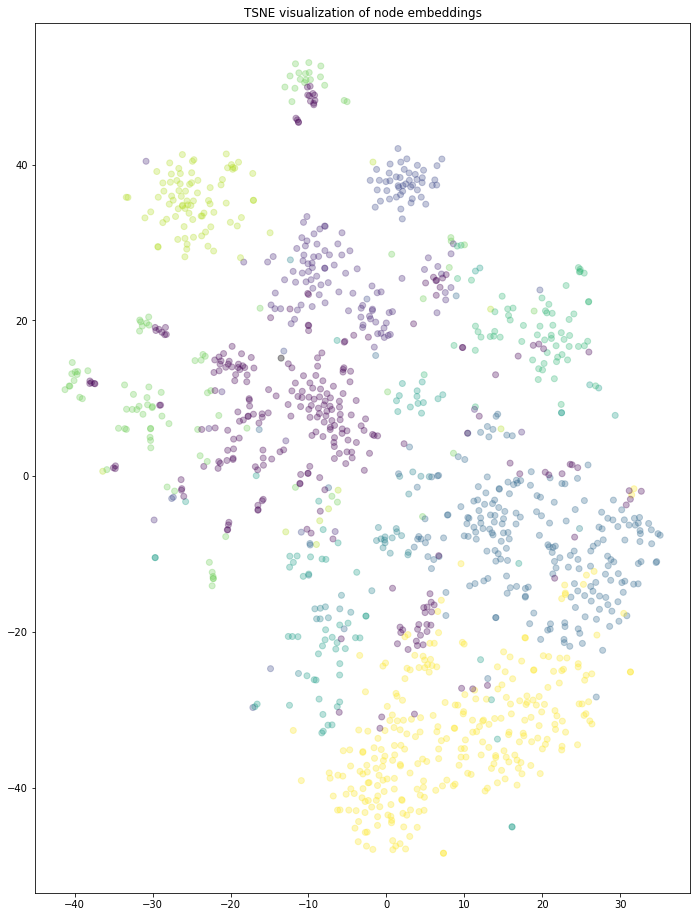

In [25]:
import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(label))}
node_colours = [ label_map[target] for target in label]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

(1) Aply on actor nodes Only

In [22]:
from sklearn.cluster import KMeans
for n in [3, 5, 10, 30, 50, 100, 200, 500]:
  kmeans = KMeans(n_clusters=n, random_state=0, init='k-means++').fit(actor_vectors)
  label = kmeans.labels_

  #Generated Dictionary for each actor
  dictionary = {}
  for i in range(len(actor_ids)):
    if(label[i] not in dictionary):
      dictionary[(label[i])] = [actor_ids[i]]
    else:
      dictionary[(label[i])].append(actor_ids[i])

  cost1,cost2 =0,0                              
  for i in dictionary:                       
    lst = dictionary[i]                       
    
    U = nx.Graph()
    for i in lst:                                                                                                                           
      e_graph = nx.ego_graph(A,i,1)                                 
      U.add_edges_from(e_graph.edges())
      U.add_nodes_from(e_graph.nodes())
    cost1 += len(max(nx.connected_components(U)))/(nx.number_of_nodes(U))
    cost2 += nx.number_of_edges(U)/(nx.number_of_nodes(U) - len(lst))     
  cost1 = cost1 / n
  cost2 = cost2 / n    
  print("Number of clusters:",n,"   Cost Value :",cost1*cost2)

Number of clusters: 3    Cost Value : 3.7021492331516765
Number of clusters: 5    Cost Value : 2.540674961708628
Number of clusters: 10    Cost Value : 2.440988890578992
Number of clusters: 30    Cost Value : 1.644172390009027
Number of clusters: 50    Cost Value : 1.8083234611526204
Number of clusters: 100    Cost Value : 1.5711973742042529
Number of clusters: 200    Cost Value : 1.6218510937003008
Number of clusters: 500    Cost Value : 1.816070712973073


Fit algo with best clusters

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(actor_vectors)
label = kmeans.labels_

2D Scatter plot

In [0]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_vectors)

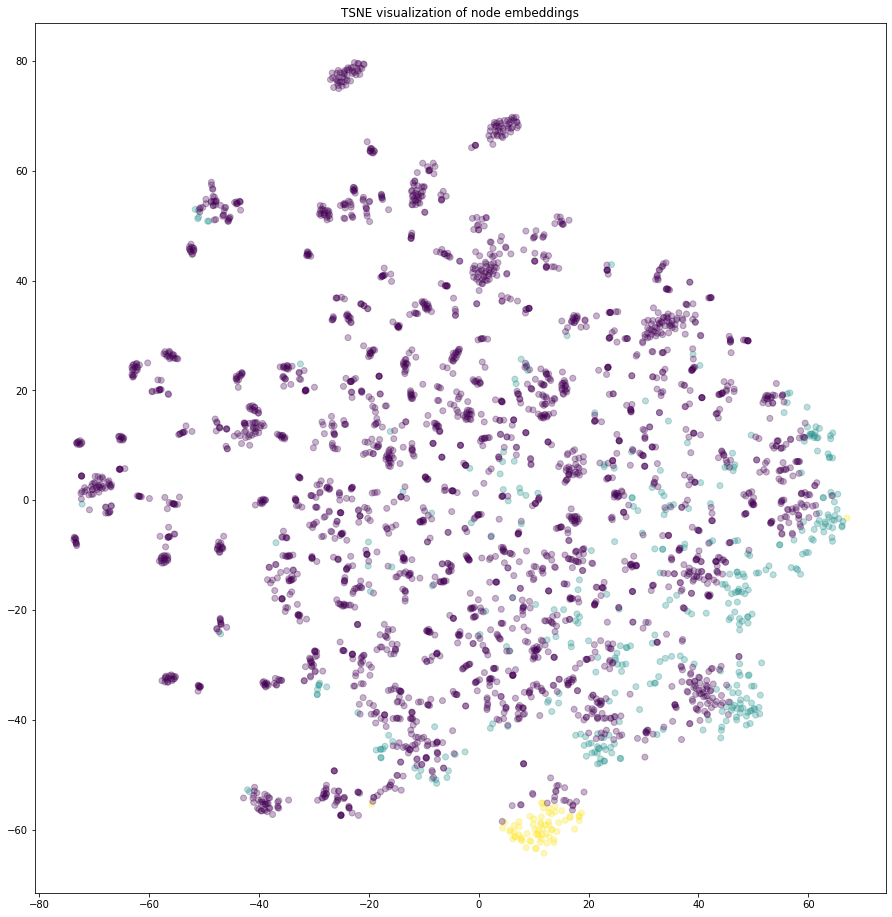

In [30]:
import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(label))}

node_colours = [ label_map[target] for target in label]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()